In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [125]:

adults_df = pd.read_csv("../data/adult.csv")
adults_df = adults_df.replace("?", np.nan)
adults_df[(adults_df["salary K$"] < 50) & (adults_df["salary"] == ">50K") | (adults_df["salary K$"] > 50) & (adults_df["salary"] == "<=50")].count()


Unnamed: 0        0
age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
salary            0
salary K$         0
dtype: int64

# Task 1
Print the count of men and women in the dataset.

In [126]:
males_count = adults_df[adults_df["sex"] == "Male"].shape[0]
feamles_count = adults_df[adults_df["sex"] == "Female"].shape[0]
males_count, feamles_count

(21790, 10771)

# Task 2
Find the average age of men in dataset

In [127]:
average_age_men = adults_df[adults_df["sex"] == "Male"]["age"].mean()
average_age_men

39.43354749885268

# Task 3
Get the percentage of people from Poland (native-country)

In [128]:
polands = round(adults_df[adults_df["native-country"] == "Poland"].shape[0] / adults_df.shape[0] * 100, 2)
polands

0.18

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [129]:
mean_age_more_50 = adults_df[adults_df["salary"] == ">50K"]["age"].mean()
std_age_more_50 = adults_df[adults_df["salary"] == ">50K"]["age"].std()

mean_age_less_50 = adults_df[adults_df["salary"] == "<=50K"]["age"].mean()
std_age_less_50 = adults_df[adults_df["salary"] == "<=50K"]["age"].std()
mean_age_more_50, std_age_more_50, mean_age_less_50, std_age_less_50

(44.24984058155847, 10.519027719851826, 36.78373786407767, 14.02008849082488)

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [130]:
higher_ed_df = pd.DataFrame({"Degree": ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]})
adults_df[(~adults_df["education"].isin(higher_ed_df["Degree"])) & (adults_df["salary"] == ">50K")]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
27,27,54,NaN,Some-college,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,60,South,>50K,275
38,38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,38,NaN,>50K,166
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32510,32510,39,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,45,NaN,>50K,212
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [131]:
adults_df.groupby('education')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [132]:
married_men = adults_df[adults_df['marital-status'].str.startswith('Married')]
non_married_men = adults_df[~adults_df['marital-status'].str.startswith('Married')]

married_men_income = married_men["salary K$"].sum()
non_married_men_icome = non_married_men["salary K$"].sum()

married_men_income > non_married_men_icome


True

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [133]:
max_hours = adults_df["hours-per-week"].max()
hard_working_people = adults_df[adults_df["hours-per-week"] == max_hours]
hard_working_people_count = hard_working_people.shape[0]
max_hours, hard_working_people_count


(99, 85)

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

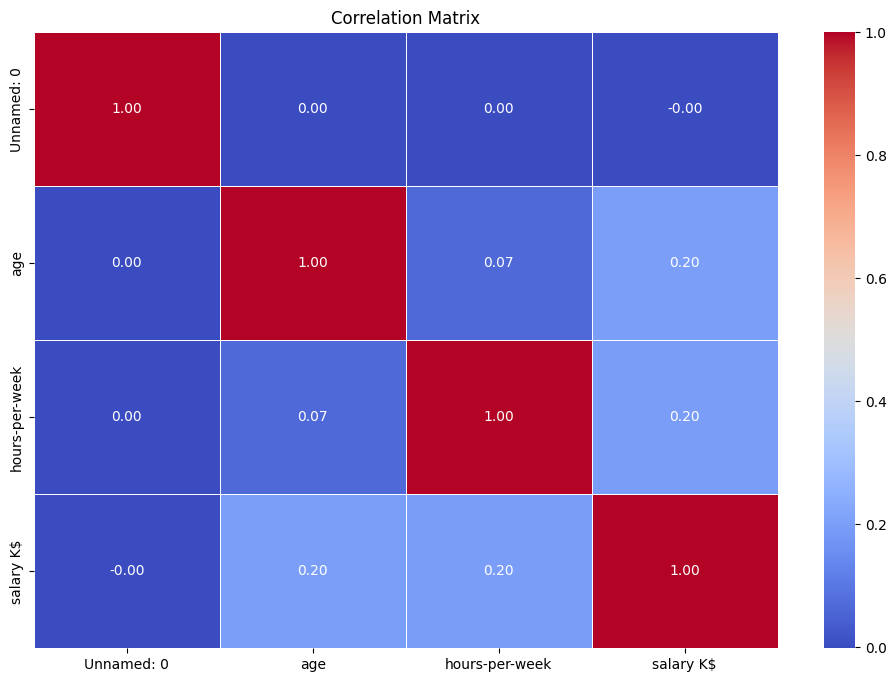

In [137]:
adults_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(adults_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()